In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder ,StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import f1_score
import joblib
import seaborn as sns


In [29]:
data=pd.read_csv("data.csv")
# print(data.head(5))
# data.info()
data.describe()

,age,gender,pressurehight,pressurelow,glucose,kcm,troponin,impluse
count,1319.000000,1319.000000,1319.000000,1319.000000,1319.000000,1319.000000,1319.000000,1319.000000
mean,56.191812,0.659591,127.170584,72.269143,146.634344,15.274306,0.360942,78.336619
std,13.647315,0.474027,26.122720,14.033924,74.923045,46.327083,1.154568,51.630270
min,14.000000,0.000000,42.000000,38.000000,35.000000,0.321000,0.001000,20.000000
25%,47.000000,0.000000,110.000000,62.000000,98.000000,1.655000,0.006000,64.000000
50%,58.000000,1.000000,124.000000,72.000000,116.000000,2.850000,0.014000,74.000000
75%,65.000000,1.000000,143.000000,81.000000,169.500000,5.805000,0.085500,85.000000
max,103.000000,1.000000,223.000000,154.000000,541.000000,300.000000,10.300000,1111.000000


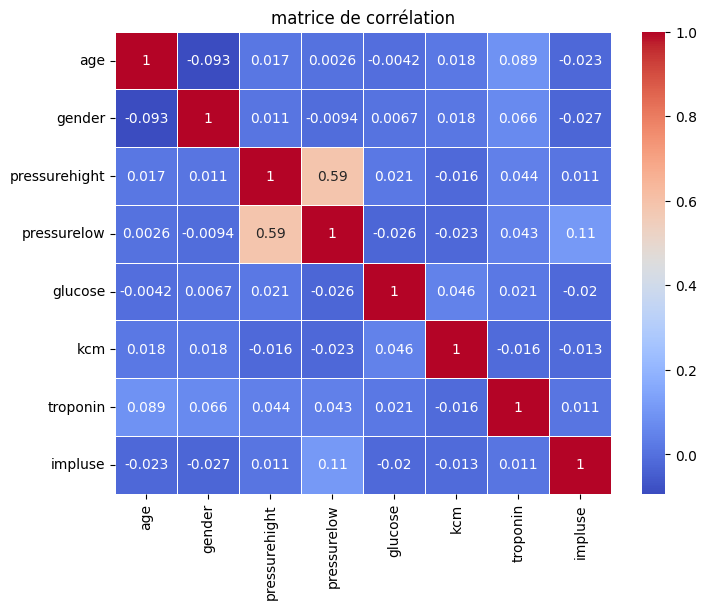

In [ ]:
#matrice correlation
num_col = data.drop(columns=['status'])
corr_matrix=num_col.corr()
plt.figure(figsize=(8,6))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('matrice de corrélation')
plt.show()

In [8]:
data.isnull().sum()

age              0
gender           0
status           0
pressurehight    0
pressurelow      0
glucose          0
kcm              0
troponin         0
impluse          0
dtype: int64

In [61]:
# encoder=OneHotEncoder(sparse_output=False)
encoder=LabelEncoder()
data['status']=encoder.fit_transform(data['status'])
# print(data['status'])
print(data)
# variable_categorielles = encoder.get_feature_names_out(['status'])
# encoded_df = pd.DataFrame(encoded_cat, columns=variable_categorielles)
# new_data = data.drop(columns=['status'])
# new_data = pd.concat([encoded_df,new_data],axis=1)
# print(new_data.head(5).to_string())

           age  gender  status  pressurehight  pressurelow   glucose  \
0     0.572358       1       0       1.257215     0.764927  0.178459   
1    -2.579640       1       1      -1.117098    -1.872542  1.994344   
2    -0.087363       1       0       1.257215     0.337229  1.647189   
3     0.572358       1       1      -0.274600    -1.230995  1.647189   
4    -0.087363       1       0      -0.580963    -0.518166  2.047752   
...        ...     ...     ...            ...          ...       ...   
1314 -0.893688       1       0      -0.198009    -0.375600  0.765951   
1315  0.718963       1       1      -0.083123    -1.230995  0.031586   
1316 -0.820385       1       1       1.563578     2.261869 -0.676074   
1317 -0.160665       1       1      -0.389486    -0.304317  3.957101   
1318 -0.380572       1       1       1.142329     0.479795 -0.168695   

           kcm  troponin   impluse  
0    -0.290962 -0.302342 -0.239032  
1    -0.184072  0.605701  0.303491  
2    -0.286859 -0.310140

In [ ]:

num_cols = ['age','pressurehight','pressurelow','glucose','kcm','troponin','impluse']
scaler = StandardScaler()
data[num_cols] = scaler.fit_transform(data[num_cols])
print(data.head())


   status_negative  status_positive       age  gender  pressurehight  \
0              1.0              0.0  0.572358       1       1.257215   
1              0.0              1.0 -2.579640       1      -1.117098   
2              1.0              0.0 -0.087363       1       1.257215   
3              0.0              1.0  0.572358       1      -0.274600   
4              1.0              0.0 -0.087363       1      -0.580963   

   pressurelow   glucose       kcm  troponin   impluse  
0     0.764927  0.178459 -0.290962 -0.302342 -0.239032  
1    -1.872542  1.994344 -0.184072  0.605701  0.303491  
2     0.337229  1.647189 -0.286859 -0.310140 -0.277784  
3    -1.230995  1.647189 -0.030324 -0.207032 -0.161529  
4    -0.518166  2.047752 -0.306509 -0.310140 -0.277784  


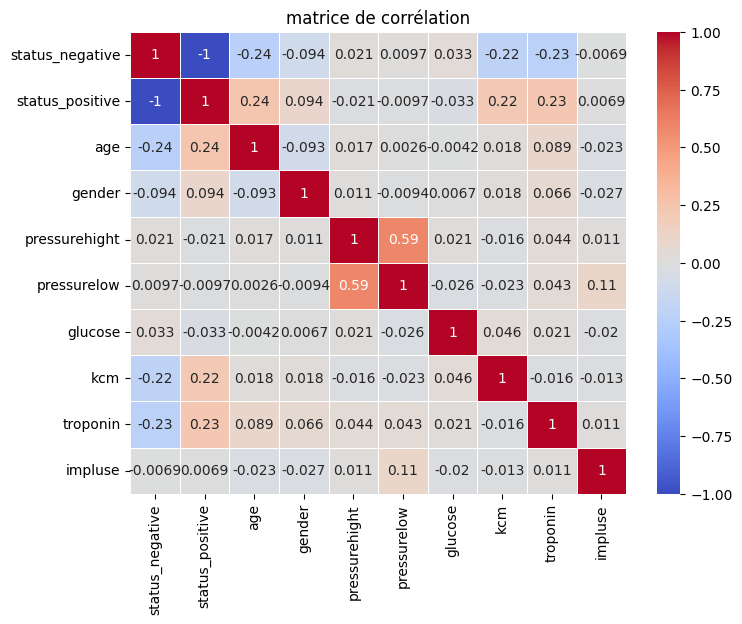

In [ ]:
#matrice correlation
corr_matrix=data.corr()
plt.figure(figsize=(8,6))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('matrice de corrélation')
plt.show()

In [63]:
data.to_csv('data_clean.csv',index=False)
# print(data["status"].value_counts())


In [69]:
X=data.drop(columns=['status'])
y=data['status']

X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)

pipeline=Pipeline(steps=[
    ('model',RandomForestClassifier())
])

param_grid=[
    {
        'model':[LogisticRegression(max_iter=1000,random_state=42)],
        'model__C':[0.1,1,10],
        'model__solver':['liblinear','lbfgs']
    },
    {
        'model':[RandomForestClassifier(random_state=42)],
        'model__n_estimators':[100,200],
        'model__max_depth':[5,10,None],
        'model__min_samples_split':[2,5]
    }
]

grid_search=GridSearchCV(
    pipeline,param_grid,cv=5,scoring='accuracy',n_jobs=-1
)

grid_search.fit(X_train,y_train)
print("best_estimator_: ",grid_search.best_estimator_)
print("best_params_: ",grid_search.best_params_)
print("cv: ",grid_search.best_score_)
y_pred=grid_search.predict(X_test)
print("F1-score: ",f1_score(y_test,y_pred))

joblib.dump(grid_search.best_estimator_,'model_cardio.pkl')


best_estimator_:  Pipeline(steps=[('model',
                 RandomForestClassifier(max_depth=10, min_samples_split=5,
                                        random_state=42))])
best_params_:  {'model': RandomForestClassifier(random_state=42), 'model__max_depth': 10, 'model__min_samples_split': 5, 'model__n_estimators': 100}
cv:  0.9886255924170616
F1-score:  0.9847094801223242


['model_cardio.pkl']

In [3]:
model=joblib.load("model_cardio.pkl")
# print(model)
print(model.get_params())


{'memory': None, 'steps': [('model', RandomForestClassifier(max_depth=10, min_samples_split=5, random_state=42))], 'transform_input': None, 'verbose': False, 'model': RandomForestClassifier(max_depth=10, min_samples_split=5, random_state=42), 'model__bootstrap': True, 'model__ccp_alpha': 0.0, 'model__class_weight': None, 'model__criterion': 'gini', 'model__max_depth': 10, 'model__max_features': 'sqrt', 'model__max_leaf_nodes': None, 'model__max_samples': None, 'model__min_impurity_decrease': 0.0, 'model__min_samples_leaf': 1, 'model__min_samples_split': 5, 'model__min_weight_fraction_leaf': 0.0, 'model__monotonic_cst': None, 'model__n_estimators': 100, 'model__n_jobs': None, 'model__oob_score': False, 'model__random_state': 42, 'model__verbose': 0, 'model__warm_start': False}
